In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

In [6]:
data = pd.read_excel('pH_vs_V.xls')
pH = np.array(data['pH'])
Vadded = np.array(data['Vadded'])

In [102]:
# находим экстремумы
def plotpeaks(data): 
    for i in find_peaks(data, width = 0, height = 5)[0]:
        plt.plot(Vadded[i], data[i], 'ro')
        ax.annotate(Vadded[i], xy = (Vadded[i], data[i]),fontsize = 20)
    for i in find_peaks(-data, width = 0, height = 5)[0]:
        plt.plot(Vadded[i], data[i], 'ro')
        ax.annotate(Vadded[i], xy = (Vadded[i], data[i]),fontsize = 20)

In [139]:
# чертим производные и пики
def plotders(x, y, numofders):
    ax.plot(x, y,'bo', label = 'Экспериментальная кривая титрования')
    der = np.gradient(y, x)
    for i in range(0, numofders):
        ax.plot(x, der, label = f'Производная {i+1} порядка')
        plotpeaks(der)
        der = np.gradient(der, x)
        
    ax.legend() #легенда

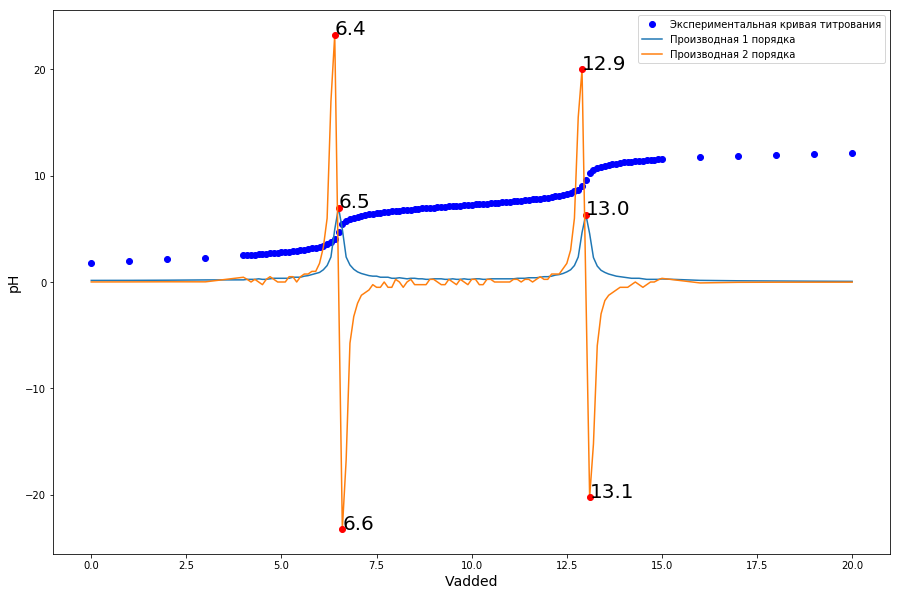

In [140]:
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(111)
ax.set_ylabel('pH', size = 14)
ax.set_xlabel('Vadded', size = 14)
plotders(Vadded, pH, 2)